In [22]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm

# Load Data

In [2]:
df = pd.read_csv("../../../Data/advertising.csv")
print(df.shape)
df.head()

(200, 4)


,TV,Radio,Newspaper,Sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   TV         200 non-null    float64
 1   Radio      200 non-null    float64
 2   Newspaper  200 non-null    float64
 3   Sales      200 non-null    float64
dtypes: float64(4)
memory usage: 6.4 KB


In [4]:
df.describe()

,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000
mean,147.042500,23.264000,30.554000,14.022500
std,85.854236,14.846809,21.778621,5.217457
min,0.700000,0.000000,0.300000,1.600000
25%,74.375000,9.975000,12.750000,10.375000
50%,149.750000,22.900000,25.750000,12.900000
75%,218.825000,36.525000,45.100000,17.400000
max,296.400000,49.600000,114.000000,27.000000


# Exploratory Analysis

In [5]:
%matplotlib inline

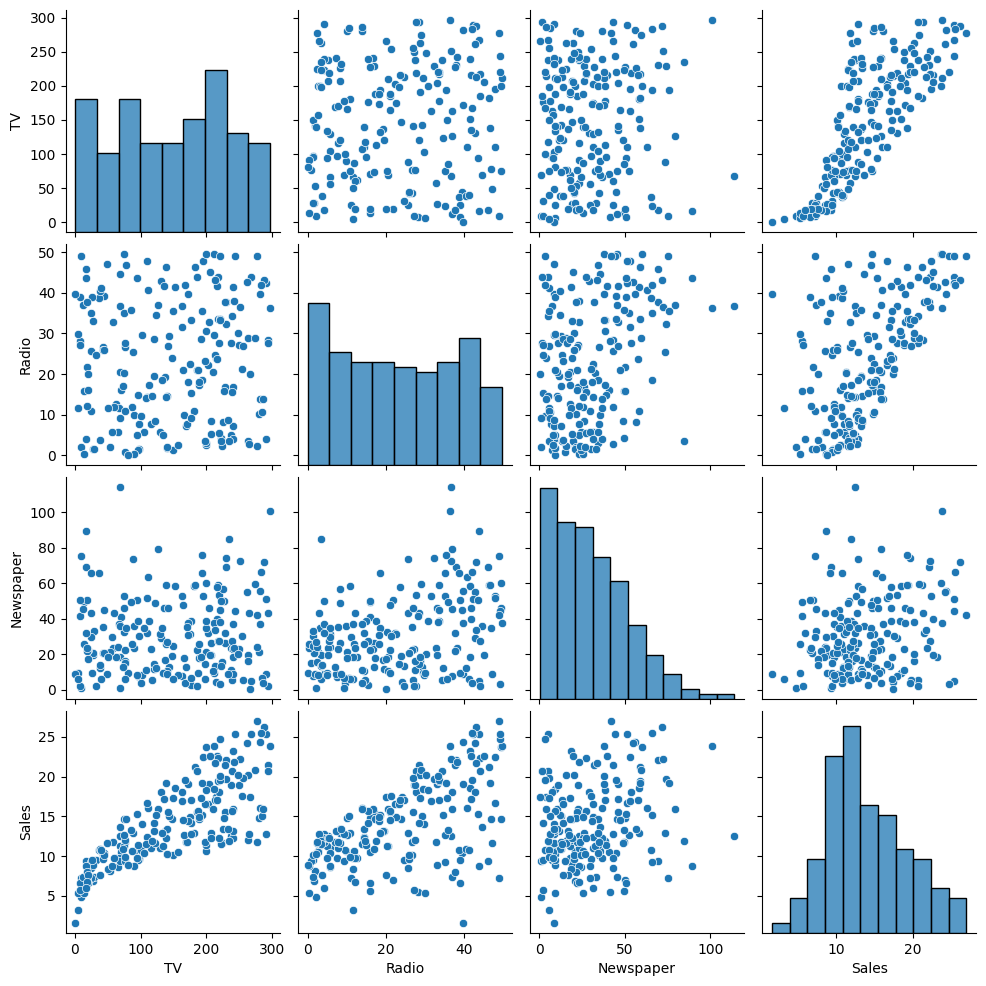

In [6]:
sns.pairplot(df)
plt.show()

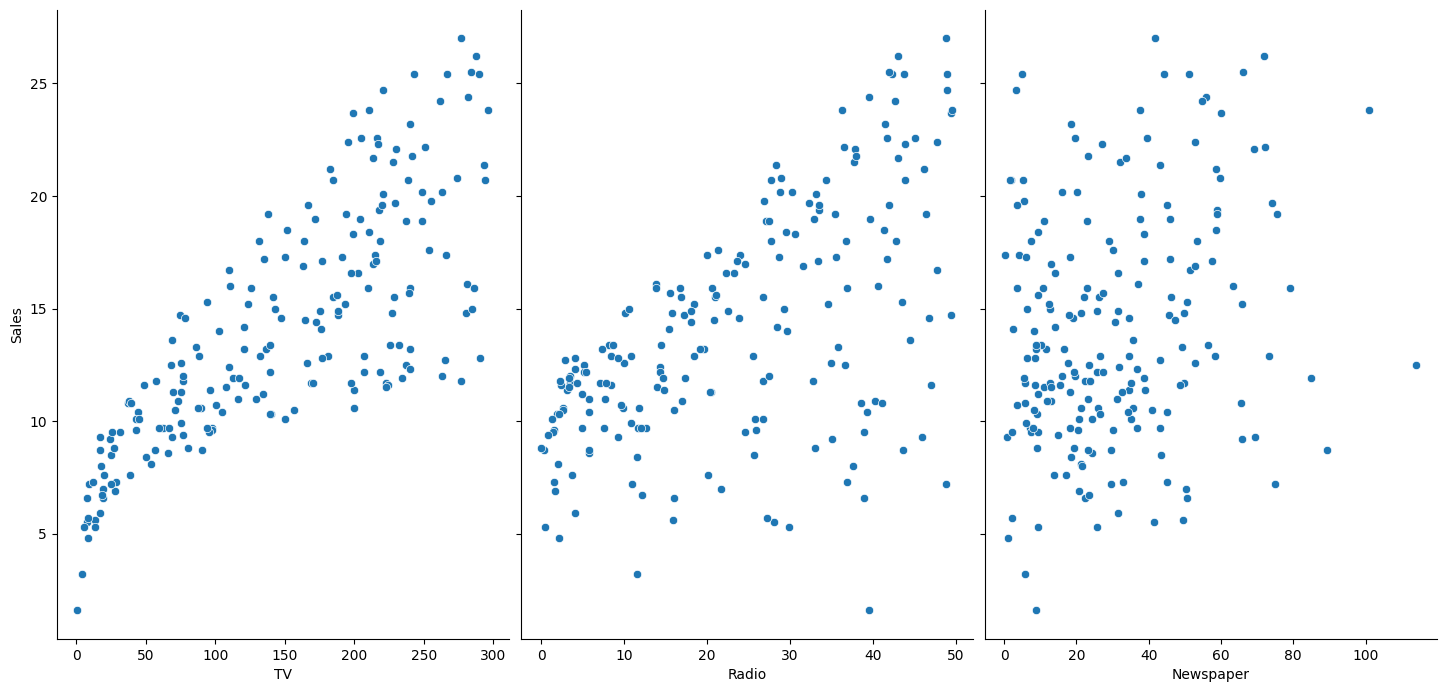

In [7]:
sns.pairplot(
    df, x_vars=["TV", "Radio", "Newspaper"], y_vars="Sales", height=7, aspect=0.7
)
plt.show()

# Data Preparation

In [8]:
X = df[["TV", "Radio", "Newspaper"]]
y = df["Sales"]

In [9]:
X.shape, y.shape

((200, 3), (200,))

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, train_size=0.7, random_state=377
)

In [11]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((140, 3), (140,), (60, 3), (60,))

# Training

In [12]:
model = LinearRegression()
model.fit(X_train, y_train)
model.get_metadata_routing()

{'fit': {'sample_weight': None}, 'score': {'sample_weight': None}}

In [13]:
model.get_params()

{'copy_X': True, 'fit_intercept': True, 'n_jobs': None, 'positive': False}

In [14]:
model.intercept_

2.5403981942556175

In [15]:
pd.DataFrame(model.coef_, X_train.columns, columns=["Coeffiecient"])

,Coeffiecient
TV,0.047969
Radio,0.182579
Newspaper,0.002625


# Evaluation

In [16]:
y_pred = model.predict(X_test)

Text(0, 0.5, 'Y predicted')

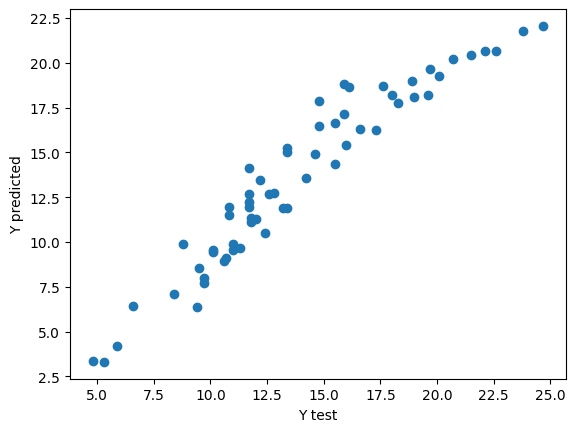

In [17]:
plt.scatter(y_test, y_pred)
plt.xlabel("Y test")
plt.ylabel("Y predicted")

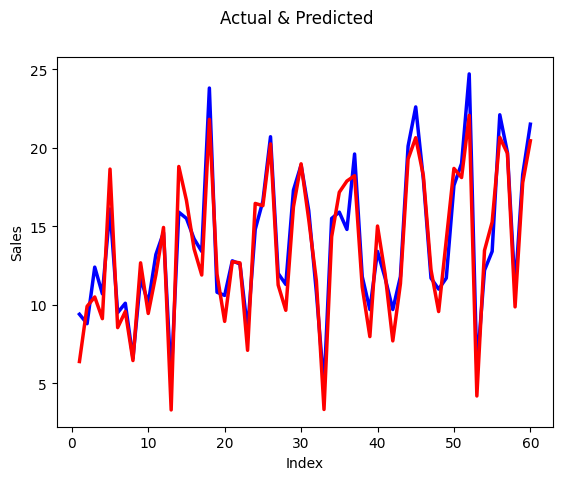

In [18]:
c = [i for i in range(1, len(y_pred) + 1)]

fig = plt.figure()

plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred, color="red", linewidth=2.5, linestyle="-")

fig.suptitle("Actual & Predicted")
plt.xlabel("Index")
plt.ylabel("Sales")

plt.show()

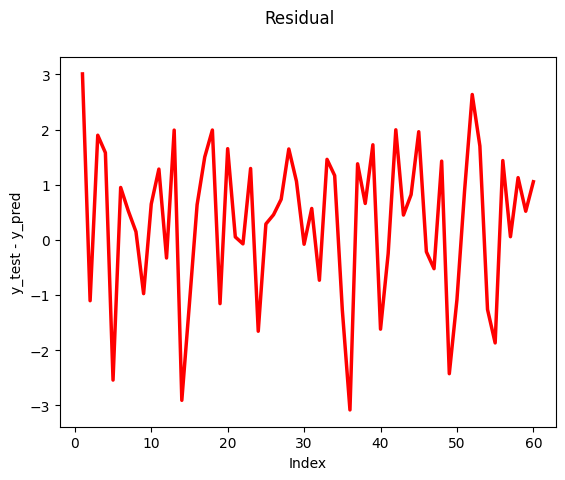

In [19]:
c = [i for i in range(1, len(y_pred) + 1)]

fig = plt.figure()

plt.plot(c, y_test - y_pred, color="red", linewidth=2.5, linestyle="-")

fig.suptitle("Residual")
plt.xlabel("Index")
plt.ylabel("y_test - y_pred")

plt.show()

In [20]:
mean_squared_error(y_test, y_pred)

2.0459339938884553

In [21]:
r2_score(y_test, y_pred)

0.9017582162837724

# Checking P-value

In [23]:
X_train_sm = X_train

# explicitly need to specify, we need constant term value as well
X_train_sm = sm.add_constant(X_train_sm)

model_sm = sm.OLS(y_train, X_train_sm).fit()

model_sm.params

const        2.540398
TV           0.047969
Radio        0.182579
Newspaper    0.002625
dtype: float64

In [24]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     379.1
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           7.84e-66
Time:                        08:43:20   Log-Likelihood:                -279.61
No. Observations:                 140   AIC:                             567.2
Df Residuals:                     136   BIC:                             579.0
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5404      0.399      6.364      0.000       1.751       3.330
TV             0.0480      0.002     27.408      0.000       0.045       0.051
Radio          0.1826      0.011     16.763      0.000       0.161       0.204
Newspaper      0.0026      0.007      0.361      0.718      -0.012       0.017
==============================================================================
Omnibus:                       38.680   Durbin-Watson:                   1.793
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               72.551
Skew:                          -1.248   Prob(JB):                     1.76e-16
Kurtosis:                       5.490   Cond. No.                         458.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

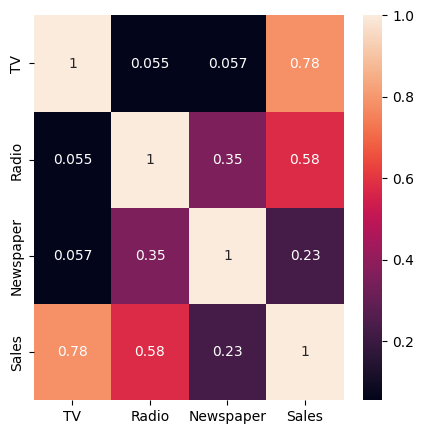

In [25]:
plt.figure(figsize=(5, 5))
sns.heatmap(df.corr(), annot=True)

plt.show()

# Using Post-training inferences to evolve model

In [26]:
X_train_2 = X_train[["TV", "Radio"]]
X_test_2 = X_test[["TV", "Radio"]]

In [27]:
model = LinearRegression()
model.fit(X_train_2, y_train)

LinearRegression()

In [28]:
y_pred_2 = model.predict(X_test_2)

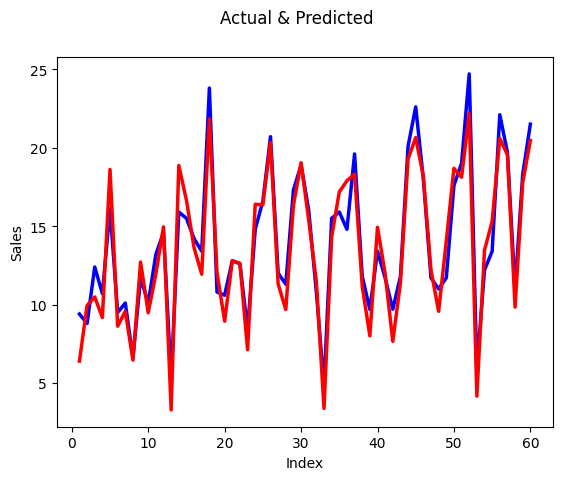

In [29]:
c = [i for i in range(1, len(y_pred_2) + 1)]

fig = plt.figure()

plt.plot(c, y_test, color="blue", linewidth=2.5, linestyle="-")
plt.plot(c, y_pred_2, color="red", linewidth=2.5, linestyle="-")

fig.suptitle("Actual & Predicted")
plt.xlabel("Index")
plt.ylabel("Sales")

plt.show()

In [30]:
mean_squared_error(y_test, y_pred_2)

2.016685907862429

In [31]:
r2_score(y_test, y_pred_2)

0.9031626526683605

In [32]:
X_train_sm2 = X_train_2

# explicitly need to specify, we need constant term value as well
X_train_sm2 = sm.add_constant(X_train_sm2)

model_sm = sm.OLS(y_train, X_train_sm2).fit()

model_sm.params

const    2.588076
TV       0.047976
Radio    0.184095
dtype: float64

In [33]:
model_sm.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Sales   R-squared:                       0.893
Model:                            OLS   Adj. R-squared:                  0.892
Method:                 Least Squares   F-statistic:                     572.2
Date:                Thu, 02 Nov 2023   Prob (F-statistic):           3.09e-67
Time:                        08:55:39   Log-Likelihood:                -279.67
No. Observations:                 140   AIC:                             565.3
Df Residuals:                     137   BIC:                             574.2
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.5881      0.376      6.891      0.000       1.845       3.331
TV             0.0480      0.002     27.500      0.000       0.045       0.051
Radio          0.1841      0.010     18.375      0.000       0.164       0.204
==============================================================================
Omnibus:                       39.486   Durbin-Watson:                   1.797
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               76.058
Skew:                          -1.259   Prob(JB):                     3.05e-17
Kurtosis:                       5.588   Cond. No.                         427.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""